In [1]:
import geopandas as gpd
from rasterstats import zonal_stats   
import pandas as pd
import glob
import re
from tqdm import tqdm

In [4]:
tifs = glob.glob( r"C:\Users\dskcy\UEInfo\TROPOMI_EXTRACTS\data\India_NO2_yearly_tifs\*.tif")# + \
        # glob.glob( r"C:\Users\dskcy\UEInfo\TROPOMI_EXTRACTS\data\PHILIPPINES_SO2_yearly_tifs\*.tif") + \
        # glob.glob( r"C:\Users\dskcy\UEInfo\TROPOMI_EXTRACTS\data\PHILIPPINES_HCHO_yearly_tifs\*.tif") + \
        # glob.glob( r"C:\Users\dskcy\UEInfo\TROPOMI_EXTRACTS\data\PHILIPPINES_O3_yearly_tifs\*.tif") + \
        # glob.glob( r"C:\Users\dskcy\UEInfo\TROPOMI_EXTRACTS\data\PHILIPPINES_UVAI_yearly_tifs\*.tif") + \
        # glob.glob( r"C:\Users\dskcy\UEInfo\TROPOMI_EXTRACTS\data\PHILIPPINES_AOD_yearly_tifs\*.tif")

In [5]:
gdf = gpd.read_file(r"C:\Users\dskcy\UEInfo\TROPOMI_EXTRACTS\assets\india_gis_agroclimatic_zones\india_agroclimatic_zones.shp")
#gdf = gpd.read_file(r"C:\Users\dskcy\UEInfo\TROPOMI_EXTRACTS\assets\philippines_airsheds\philippines_airsheds.shp")

In [6]:
gdfs = []
for tif in tqdm(tifs):
    dummy_gdf = gdf.copy()
    #date = re.findall(r'\d{4}-\d{2}-\d{2}',tif)[0]
    date = re.findall(r'\d{4}',tif)[0]
    #pollutant = 'aod'
    pollutant = re.findall(r'INDIA_yearlyavg_(.*?)_\d{4}-\d{2}-\d{2}', tif)[0]
    
    dummy_gdf['mean'.format(pollutant)] = pd.DataFrame(
        zonal_stats(
            vectors=dummy_gdf['geometry'], 
            raster=tif, 
            stats='mean'
        ))['mean']

    dummy_gdf['date'] = date
    dummy_gdf['pollutant'] = pollutant
    gdfs.append(dummy_gdf)

  0%|          | 0/2 [00:00<?, ?it/s]C:\Users\dskcy\anaconda3\Lib\site-packages\rasterstats\io.py:328: NodataWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn(
100%|██████████| 2/2 [00:01<00:00,  1.01it/s]


In [7]:
master = pd.concat(gdfs)
master

,objectid,airshednam,airshednum,geometry,mean,date,pollutant
0,1,desert,11,"POLYGON ((76.10105 28.14719, 76.09610 28.13912...",0.000067,2019,no2
1,2,himal_west,1,"POLYGON ((74.71460 37.07208, 74.71850 37.06276...",0.000060,2019,no2
2,3,plate_south,10,"POLYGON ((78.34088 19.88362, 78.35133 19.88184...",0.000067,2019,no2
3,4,igp_upper,4,"POLYGON ((77.59785 30.40388, 77.59956 30.40312...",0.000087,2019,no2
4,5,coast_gujar,12,"MULTIPOLYGON (((72.65792 21.47014, 72.65792 21...",0.000070,2019,no2
5,6,plate_west,8,"POLYGON ((75.18425 25.04395, 75.18749 25.03889...",0.000070,2019,no2
6,7,himal_east,2,"MULTIPOLYGON (((96.18000 29.36213, 96.18504 29...",0.000054,2019,no2
7,8,plate_cent,7,"POLYGON ((76.36402 28.12371, 76.38523 28.13331...",0.000072,2019,no2
8,9,coast_west,13,"MULTIPOLYGON (((72.87769 20.22640, 72.88886 20...",0.000061,2019,no2
9,10,plate_east,9,"POLYGON ((87.83738 24.74659, 87.84496 24.73920...",0.000079,2019,no2


In [8]:
pivot_table = pd.pivot_table(master, 
                             values=['mean'], 
                             index=['airshednum','date'], 
                             columns=['pollutant'], 
                             )
pivot_table.columns = pivot_table.columns.droplevel(0)

pivot_table = pivot_table.reset_index()
pivot_table['year'] = pivot_table['date'].str[:4]
pivot_table.drop('date',axis=1, inplace=True)
#pivot_table['aod'] = pivot_table['aod']/1000
pivot_table

pollutant,airshednum,no2,year
0,1,0.000060,2019
1,1,0.000060,2023
2,2,0.000054,2019
3,2,0.000060,2023
4,3,0.000088,2019
5,3,0.000093,2023
6,4,0.000087,2019
7,4,0.000092,2023
8,5,0.000082,2019
9,5,0.000087,2023


In [27]:
pivot_table.merge(gdf[['airshednam','airshednum']],on='airshednum').to_csv('PHILIPPINES_regionalsheds_pollutants_means_yearly.csv', index=False)

# Choropleths

In [9]:
import pandas as pd
import geopandas as gpd
import numpy as np

import jenkspy
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap


In [10]:
#df = pd.read_csv("Regionalairshed_TROPOMI_means_yearly.csv")
df=pivot_table

In [11]:
#gdf = gpd.read_file(r"C:\Users\dskcy\UEInfo\TROPOMI_EXTRACTS\assets\india_gis_agroclimatic_zones\india_agroclimatic_zones.shp")
gdf = gpd.read_file(r"C:\Users\dskcy\UEInfo\TROPOMI_EXTRACTS\assets\philippines_airsheds\philippines_airsheds.shp")

In [13]:
pollutant = 'aod'
# Bin pollutant concentration values
# Determine the number of bins
n_bins = 5

# Apply Jenks natural breaks
breaks = jenkspy.jenks_breaks(df[pollutant], n_classes=n_bins)
# Assign bins
df['bin'] = np.searchsorted(breaks, df[pollutant], side='right') - 1

In [15]:
np.array(breaks)

array([ 53.38529051,  66.85915493,  79.24910314,  93.11295094,
       106.2275475 , 124.56338028])

In [16]:
colors_UVAI = ['#073763ff', 
          '#00ffffff',
          '#b7b7b7ff',
          '#595959ff', 
          '#ff9900ff', 
          '#832401ff', 
          ]  # Define your colors

colors = ['#274e13ff', #Dark Green
          '#9ad9adff', # Light green
          '#00ffffff', # cyan
          '#f5fc17ff', # yellow
          '#e88a27ff', #orange
          '#f50717ff' #red
          ]  # Define your colors

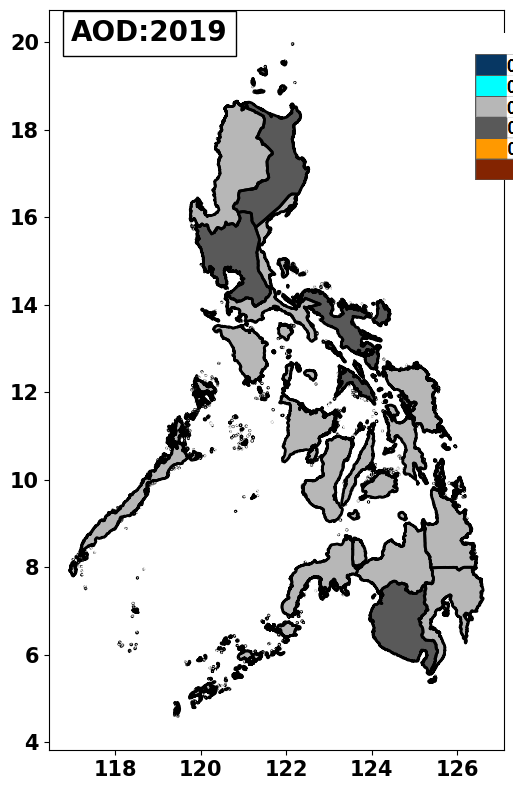

In [25]:
year = 2019
df_year = df[df.year==str(year)]

fig, ax = plt.subplots(1, 1, figsize=(8, 8))

colors = colors_UVAI

cmap_name = 'custom_cmap'

colors = [colors[i] for i in sorted(df_year['bin'].unique())]
# Create the colormap
custom_cmap = LinearSegmentedColormap.from_list(cmap_name, colors, N=len(colors))
gdf.boundary.plot(ax=ax, linewidth=2, color='black')  # Adjust the boundary thickness here
gdf.merge(df_year, on='airshednum')[['bin','geometry']].plot(column = 'bin',
                                                                       ax=ax,
                                                                       cmap=custom_cmap,
                                                                      # legend=True,
                                                                      # vmin=df['no2'].min(),
                                                                      # vmax=df['no2'].max()
                                                                      )


#Add year - month annotation
bbox_props = dict(boxstyle="square,pad=0.3", fc="white", ec="black", lw=1)
plt.text(118.8, 20.2,
        '{}:{}'.format(pollutant.upper(),year),
        fontsize=20, fontweight='bold', color='black',
        ha='center', va='center',
            bbox=bbox_props)

plt.xticks(weight = 'bold', fontsize=15)
plt.yticks(weight = 'bold', fontsize=15)

# Add legend - custom image
legend_img = plt.imread(r"C:\Users\dskcy\UEInfo\TROPOMI_EXTRACTS\assets\philippines_regional_{}_legend_150.png".format(pollutant))  # Provide the path to your image file
plt.figimage(legend_img, xo=475, yo=610)

plt.tight_layout()
plt.savefig("regionalplots/{}_{}.png".format(pollutant,year))

In [141]:
df_year

pollutant,airshednum,hcho,no2,o3,so2,uvai,year,bin
4,1,0.000125,0.000057,0.115686,0.000016,-0.635005,2023,4
9,2,0.000113,0.000057,0.122157,0.000040,-0.616296,2023,4
14,3,0.000128,0.000062,0.117690,0.000042,-0.616239,2023,4
19,4,0.000109,0.000055,0.121483,0.000082,-0.701747,2023,4
24,5,0.000084,0.000041,0.102717,0.000034,-0.587332,2023,5
29,6,0.000092,0.000049,0.120346,0.000062,-0.705320,2023,4
34,7,0.000094,0.000046,0.119265,0.000038,-0.722315,2023,4
39,8,0.000100,0.000042,0.116369,0.000045,-0.754606,2023,4
44,9,0.000099,0.000045,0.117746,0.000039,-0.822911,2023,3
49,10,0.000099,0.000044,0.119236,0.000042,-0.819939,2023,3
